In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
raw_mail_data = pd.read_csv('/content/mail_data.csv')
print(raw_mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [5]:
# we need to replace the null values with null strings
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [6]:
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#checking the number of rows and columns in th df
mail_data.shape

(5572, 2)

## Label Encoding

0 --> spam

1 --> ham

In [8]:
# Label spam mail as 0,and ham mails as 1
mail_data.loc[mail_data['Category'] == 'spam','Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham','Category',] = 1

In [9]:
#Seperating the data as texts and label
X = mail_data['Message']
Y = mail_data['Category']
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [10]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


Splitting the data into training data and test data

In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,stratify = Y,random_state = 3)

In [12]:
print(X.shape,X_train.shape,X_test.shape)

(5572,) (4457,) (1115,)


## Feature Extraction

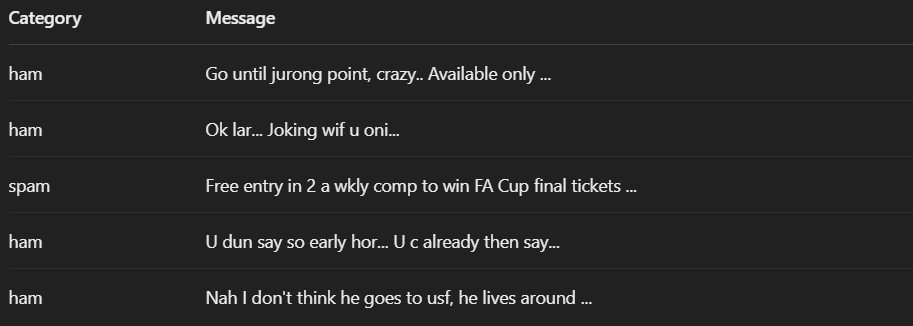

## Step 1: Preprocessing the Text Data
* The first thing we do is convert the raw text messages into numerical data using the TfidfVectorizer. Here's the breakdown:

##Text Cleaning:

* The TfidfVectorizer will remove common stopwords like "the", "and", etc.

* It will also convert all the text to lowercase so that "Free" and "free" are treated as the same word.

##Building Vocabulary:

* The fit function learns all the unique words from the training set (e.g., "jurong", "point", "crazy", "entry", etc.) and creates a vocabulary.

##Term Frequency (TF):

* This calculates how often each word appears in a given message.

* For example, in the message "Go until jurong point, crazy.." the word "jurong" appears once.

##Inverse Document Frequency (IDF):

* This measures how important a word is by considering how frequently it appears across all the documents.

* Words like "the" or "is" appear in many messages and thus will have a lower IDF score.

* Rare words (like "jurong" or "FA") will have a higher IDF, making them more important for distinguishing between messages.

##Step 2: Transforming Text Data
* Let's break down the process of transforming your text data:

* Fitting the Model on the Training Data (X_train):
When you fit the TfidfVectorizer on the training data (let's assume X_train contains the first few "ham" and "spam" messages), the vectorizer will learn the vocabulary and the corresponding IDF scores from that training data.

##Example:

* The word "jurong" appears only in the first message, so it will have a higher IDF score (indicating it's more unique).

* The word "u" (you) appears in many of the "ham" messages, so its IDF score will be lower, meaning it isn't as important for distinguishing between spam and ham.

* The result is a matrix of TF-IDF scores. For instance:
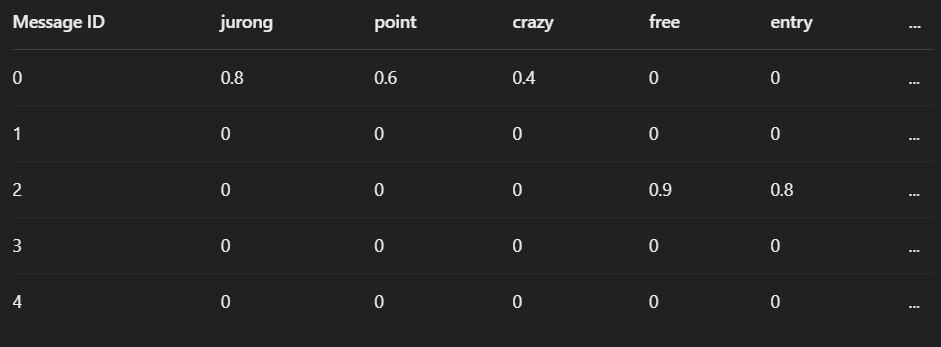
* Transforming the Test Data (X_test):
* When you transform the test data (X_test), the vectorizer does not fit to this new data. Instead, it uses the vocabulary and IDF scores it already learned from the training data. This is crucial because we don't want the test data to influence the model during training.

##For example:

* Suppose the word "jurong" appears in your test data (even if it's not in the training data). The vectorizer will still use the IDF score that it learned from the training data for this word.

##Step 3: Training the Logistic Regression Model
* Once your text data is converted into numerical feature vectors (TF-IDF scores), you can train a Logistic Regression model. The model will try to find patterns in the feature vectors that separate "ham" messages from "spam" messages.

* The model will use the feature vectors (numbers) from the training data (X_train_features) and their corresponding labels (spam/ham) to learn how to classify new messages.

* After training, the model will be able to predict whether a new message (from X_test_features) is "ham" or "spam" based on the patterns it learned.

##Recap:
* fit_transform(X_train): This step learns the vocabulary (words) and calculates TF-IDF values for the training data, transforming it into a numerical format that the model can understand.

* transform(X_test): This transforms the test data into the same format using the vocabulary and TF-IDF scores learned from the training data. It doesn't fit again, which prevents leakage of information from the test set into the training process.

In [14]:
# transform the text data to feature vectors that cant be used as input to the Logistic regression
feature_extraction = TfidfVectorizer(min_df = 1, stop_words = 'english',lowercase = True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')


In [16]:
print(X_train_features)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 34678 stored elements and shape (4457, 7493)>
  Coords	Values
  (0, 2353)	0.28101404009316056
  (0, 3806)	0.28101404009316056
  (0, 1857)	0.17073786814794129
  (0, 1193)	0.22908400928709988
  (0, 3113)	0.28101404009316056
  (0, 3627)	0.25144905621529934
  (0, 6330)	0.24059246244542992
  (0, 1540)	0.17407870571957915
  (0, 2644)	0.28101404009316056
  (0, 5029)	0.17467075796896542
  (0, 4306)	0.26793132631329497
  (0, 421)	0.25144905621529934
  (0, 4557)	0.28101404009316056
  (0, 6468)	0.26793132631329497
  (0, 1657)	0.28101404009316056
  (0, 0)	0.23628394623676158
  (1, 3982)	0.4167622750027118
  (1, 5911)	0.2761926296686631
  (1, 3941)	0.20702870014136815
  (1, 1969)	0.1749293187718031
  (1, 6553)	0.4722950153731612
  (1, 5947)	0.24356944504246256
  (1, 3948)	0.2761926296686631
  (1, 2113)	0.1985161464110967
  (1, 3828)	0.13684128003316173
  :	:
  (4456, 5091)	0.1743505991070133
  (4456, 7339)	0.13767285254208542
  (4456, 24

## Sparse Matrix:
* The data you're seeing above is a sparse matrix. A sparse matrix is an efficient way to store data where most values are zero. In this case, you're storing the TF-IDF values for each word in the vocabulary. Instead of showing the entire matrix (which would be mostly filled with zeros), only the non-zero values are displayed.

* The format (row, column) signifies the position in the matrix:

* Row: The first value (e.g., 0) represents the row index. In this case, it’s 0, meaning this entry corresponds to the first message in your training set (i.e., the first email).

* Column: The second value (e.g., 2353) represents the column index. This is the index of the word in the vocabulary learned from the training set.

* Value: The third value (e.g., 0.28101404009316056) is the TF-IDF value for that word in that document. This value tells you how important the word is in that specific message, relative to its frequency across all documents.

### Breakdown:
* (0, 2353): This means that for the first email (row 0) in the training set, the word at index 2353 in the vocabulary has a TF-IDF value of 0.281. This word is important in this document.

* (0, 3806): Similarly, for the first email, the word at index 3806 has a TF-IDF score of 0.281.

* (0, 1857): The word at index 1857 in the vocabulary has a TF-IDF score of 0.1707 in the first email.

* (0, 1193): The word at index 1193 in the vocabulary has a TF-IDF score of 0.2291 in the first email.

* (0, 3113): The word at index 3113 in the vocabulary has a TF-IDF score of 0.281 in the first email.

## Why Only Non-Zero Entries?
* The TF-IDF vectorizer creates a large matrix where each column corresponds to a word in the vocabulary (which is huge if there are many unique words). Most of the words do not appear in every document, so the corresponding values in the matrix are zero. Instead of storing all those zeros, it only stores the non-zero values for efficiency, which is what you see in the output.


Training the Logistic Regression models

In [17]:
model = LogisticRegression()

In [19]:
#Training the logistic reg model with our training data
model.fit(X_train_features,Y_train)

LogisticRegression()

Model Evaluation


In [20]:
#Prediction on training data
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train,prediction_on_training_data)
print('Accuracy on training data: ',accuracy_on_training_data)

Accuracy on training data:  0.9667938074938299


In [21]:
#Prediction on test data
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test,prediction_on_test_data)
print('Accuracy on test data: ',accuracy_on_test_data)

Accuracy on test data:  0.9713004484304932


In [27]:
input_data = ["Now,Win 100$ now !! click here"]
transformed_input_data = feature_extraction.transform(input_data)
#print(transformed_input_data)
prediction = model.predict(transformed_input_data)
if prediction[0] == 0:
  print('Ham Mail')
else:
  print('Spam Mail')

Spam Mail
